Junye Qiu

IE517

Module 7 Homework(Random Forest)




In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

df = pd.read_csv('ccdefault.csv')
X = df.iloc[:,1:24].values
y = df.iloc[:,24].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state = 42, stratify=y)

In [27]:
from sklearn.model_selection import cross_val_score
import time

for n in [100,200,300,400,500]:
    start =time.time()
    forest = RandomForestClassifier(n_estimators = n,
                                criterion = "gini",
                                random_state = 1,
                                max_depth = None
                                )
    scores = cross_val_score(estimator = forest,
                         X = X_train,
                         y = y_train,
                         cv = 10,
                         n_jobs = -1)
    print('--------------------------------------')
    print('n_estimators: ', n)
    print('CV mean scores: ', np.mean(scores))
    print('CV scores std: ', np.std(scores))
    end = time.time()
    print('Running time: %s Seconds'%(end-start))
    



--------------------------------------
n_estimators:  100
CV mean scores:  0.8156666666666667
CV scores std:  0.004379306620302208
Running time: 17.905701637268066 Seconds
--------------------------------------
n_estimators:  200
CV mean scores:  0.8162222222222223
CV scores std:  0.0044283659785585554
Running time: 35.15527844429016 Seconds
--------------------------------------
n_estimators:  300
CV mean scores:  0.8162592592592592
CV scores std:  0.004275973645531949
Running time: 51.69054818153381 Seconds
--------------------------------------
n_estimators:  400
CV mean scores:  0.8163703703703703
CV scores std:  0.004238435407679993
Running time: 69.1022732257843 Seconds
--------------------------------------
n_estimators:  500
CV mean scores:  0.8166666666666667
CV scores std:  0.0041771473125545725
Running time: 86.36947321891785 Seconds


In [29]:
forest = RandomForestClassifier(n_estimators = 500,
                                criterion = "gini",
                                random_state = 1,
                                max_depth = None
                                )
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [35]:
feature_names = df.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"
           % (f+1,30,feature_names[indices[f]], importances[indices[f]]))

 1) PAY_0                          0.097799
 2) AGE                            0.066675
 3) BILL_AMT1                      0.060302
 4) LIMIT_BAL                      0.060122
 5) BILL_AMT2                      0.054541
 6) BILL_AMT3                      0.051528
 7) BILL_AMT6                      0.050964
 8) BILL_AMT4                      0.050531
 9) PAY_AMT1                       0.050383
10) BILL_AMT5                      0.050240
11) PAY_AMT2                       0.047785
12) PAY_AMT3                       0.046514
13) PAY_AMT6                       0.046149
14) PAY_2                          0.045184
15) PAY_AMT5                       0.043556
16) PAY_AMT4                       0.043033
17) PAY_3                          0.025717
18) PAY_4                          0.023303
19) PAY_5                          0.020974
20) EDUCATION                      0.020297
21) PAY_6                          0.018735
22) MARRIAGE                       0.013636
23) SEX                         

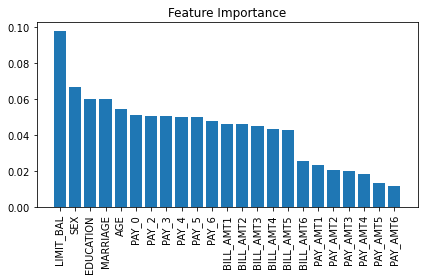

In [34]:
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align = 'center')
plt.xticks(range(X_train.shape[1]),feature_names, rotation = 90)
plt.tight_layout()
plt.show()

As n_estimators imcreases, in-sample CV accurary and computation time grow. The optional number of estimators of my model is 500. The feature "LIMIT_BAL" contributes the most importance in my model. Using a random forest, The more information we get when spliting using one features, the more important is the feature. We can measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest.